In [6]:
import signac
import os
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
project = signac.get_project()

2c6cb5dbea9a3238353470cdd9d30081


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


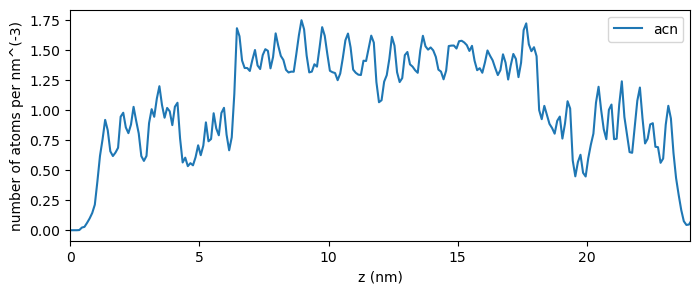

In [13]:

from CPManalysis.density_dist import calc_density_distribution
fig, ax = plt.subplots(figsize=(8,3))
case, voltage, seed = "acn_litfsi", 2, 2
for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
    with job:
        print(job.id)
        trj_file = "conp_total.xtc"
        gro_file = "system_lmp.gro"
        # res_name = "li"
        res_name = "acn"
        # res_name = "tfsi"
        trj_total = md.load(trj_file, top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=4000, res_name = res_name, binwidth = 0.1, axis = 2)
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = res_name)
        ax.legend()
        ax.set_xlabel('z (nm)')
        ax.set_xlim(0, 24)
        ax.set_ylabel('number of atoms per nm^(-3)')
        # ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$')) ## number of atoms per nm^(-3)
        

2c6cb5dbea9a3238353470cdd9d30081


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


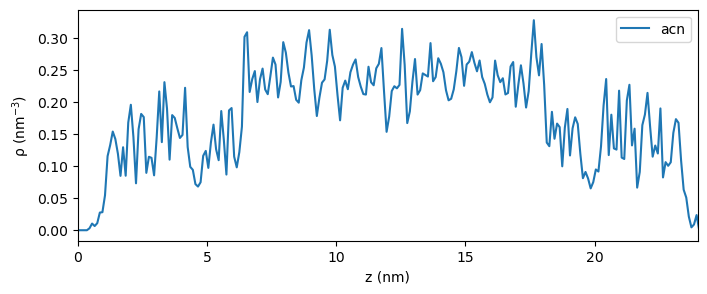

In [14]:

### using center of mass (COM)
from CPManalysis.density_dist import calc_density_distribution
fig, ax = plt.subplots(figsize=(8,3))
case, voltage, seed = "acn_litfsi", 2, 2
for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
    with job:
        print(job.id)
        trj_file = "conp_com_unwrapped.xtc"
        gro_file = "com.gro"
        # res_name = "li"
        res_name = "acn"
        # res_name = "tfsi"
        trj_total = md.load(trj_file, top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=4000, res_name = res_name, binwidth = 0.1, axis = 2)
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = res_name)
        ax.legend()
        ax.set_xlabel('z (nm)')
        ax.set_xlim(0, 24)
        ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$')) ## number of atoms per nm^(-3)